In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
pd.set_option('display.max_rows', 81)
import numpy as np
from scipy import stats
import missingno as msno

from sklearn.preprocessing import PowerTransformer

import matplotlib.pylab as plt
import seaborn as sns
color_pal = plt.rcParams['axes.prop_cycle'].by_key()['color']

import warnings
warnings.filterwarnings("ignore")
plt.style.use('ggplot')

from drive.MyDrive.Kaggle.Imputation_062022.src import functions

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Kaggle/Imputation_062022/src/data/data.csv', index_col='row_id')
sample = pd.read_csv('/content/drive/MyDrive/Kaggle/Imputation_062022/src/data/sample_submission.csv', index_col='row-col')

# Basic Exploration
- take a peak
- data types
- missing values
- basic stats (mean, IQR, std, min, max)
- unique values
- duplication

In [ ]:
data.head(20).T

row_id,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
F_1_0,-0.354591,1.380940,0.256023,-0.728420,0.590212,0.088609,0.533210,-1.737332,-0.334935,0.144170,-0.357771,0.696625,-1.086734,0.322598,0.745005,0.386307,0.641497,1.749908,-0.881626,0.651089
F_1_1,-0.464038,-0.499626,-1.059874,-2.432399,-0.066127,NaN,1.662285,-1.009690,-0.801940,-0.580150,1.619492,0.033878,0.186637,1.323594,0.566602,-0.164298,0.714770,-1.212578,1.022618,1.086403
F_1_2,2.304115,-0.418548,NaN,-2.453602,0.468009,0.270489,0.601138,0.294162,-0.754364,-0.896780,0.241737,-0.552245,-0.226690,1.655550,0.017445,-1.208667,0.958424,1.119618,0.563752,-1.986599
F_1_3,0.734486,1.911725,0.345678,-0.020509,-1.096038,0.251012,-0.662212,1.002915,-0.369206,-0.550178,-0.931236,-0.508829,-1.586084,0.790347,1.927276,0.768579,0.765871,-0.500493,-0.725024,1.013459
F_1_4,1.696395,-0.826130,1.513814,0.333397,0.119399,0.280627,0.033856,0.700551,0.781484,1.231237,-0.439494,1.326049,-0.855886,0.457020,0.285437,-2.200503,-1.713403,0.398941,-3.061641,-0.374172
F_1_5,0.136285,-1.715371,1.243864,0.086049,-1.809710,-1.705229,-0.056208,-1.071100,1.024585,-0.474318,0.544001,1.225479,-0.234057,-0.536445,0.906739,-1.498463,-1.081687,-1.238197,-0.709330,-0.537102
F_1_6,-0.518344,-0.577091,-0.509648,-1.787601,0.466358,0.320000,-1.781594,2.044173,-0.394121,-1.230894,-0.276768,0.846370,1.269481,0.777910,0.462676,0.120240,0.943967,1.419838,NaN,0.844549
F_1_7,0.502640,-1.041486,-0.800481,0.667011,-0.053196,-0.263370,0.326768,-0.545110,-0.588350,0.474766,0.299616,0.576243,0.816826,-0.298853,0.782369,0.865945,0.329246,0.378732,0.125609,-0.485204
F_1_8,-1.852504,0.596067,-0.115945,0.761564,-0.580320,2.066337,1.583396,-0.950346,0.092130,0.367473,0.031999,-0.598348,-0.242076,-2.251969,-1.389328,1.371115,2.207749,-1.623548,-3.607965,-1.793206
F_1_9,-0.500665,-0.363425,0.595777,-2.217847,-1.143500,0.127959,-0.345895,-1.425242,0.106974,-0.256849,0.222395,0.243331,1.716659,0.515479,0.190550,1.627371,-1.027082,-0.157442,-0.745329,0.998426


In [ ]:
info = pd.DataFrame({'dtype':data.dtypes.tolist(), 'missing_values':data.isnull().sum().values, 'unique_values': data.nunique().values}, index=data.columns.values)
described = data.describe().T
info = pd.concat([info, described], axis=1)
info

,dtype,missing_values,unique_values,count,mean,std,min,25%,50%,75%,max
F_1_0,float64,18397,859226,981603.0,-0.000687,1.000784,-4.664447,-0.674667,-0.000769,0.673181,5.039177
F_1_1,float64,18216,858873,981784.0,0.002091,0.999878,-4.790594,-0.672284,0.002049,0.675997,5.042807
F_1_2,float64,18008,859449,981992.0,0.000551,0.999825,-4.870645,-0.673783,0.001386,0.674490,5.130025
F_1_3,float64,18250,858808,981750.0,0.000982,0.999847,-5.053023,-0.672211,0.000370,0.674852,5.462472
F_1_4,float64,18322,859416,981678.0,0.002437,1.001151,-5.363454,-0.672326,0.002733,0.676588,4.856916
F_1_5,float64,18089,859725,981911.0,0.000635,0.999927,-5.508223,-0.673884,0.000276,0.675951,4.960724
F_1_6,float64,18133,859020,981867.0,-0.000124,1.000427,-5.199170,-0.674834,0.000814,0.673983,4.957977
F_1_7,float64,18128,813274,981872.0,-0.063857,0.725986,-6.990302,-0.500305,0.000578,0.444337,2.527570
F_1_8,float64,18162,859112,981838.0,-0.000014,1.000715,-4.566593,-0.674006,-0.000047,0.674295,4.886075
F_1_9,float64,18249,859000,981751.0,0.000451,1.000194,-4.997549,-0.673513,0.001118,0.675575,4.788579


In [ ]:
data.isnull().sum().sum()

1000000

In [ ]:
data.duplicated().sum()

0

## Analysis
- There are clearly four groups present: three numerical and one categorical
- Numerical features are dtype float64, categoricals are int64
- Categorical features do not have missing values
- There are 1 million missing values about evenly distributed among numerical features
- Standard deviation and mean are ~1 and ~0, respectively, for F_1_x and F_3_x with a few outliers: F_1: 7, 12 and 13 and F_3: 19 and 21.

In [ ]:
col_list, F1, F2, F3, F4, missing_cols = functions.get_lists(data)

In [ ]:
no_na = data.dropna()
nas = data[~data.index.isin(no_na.index)]

na_sums = data.isnull().sum(axis=1)
data['n_missing'] = na_sums
F4_missing = data[F4].isnull().sum(axis=1)
data['F4_missing'] =F4_missing

# Distributions
- Now we take a look at the distributions of the data
    - Histograms
    - Correlation heat maps
    - Box plots
    - Bar plots
    - etc.

- This can help us see if there are outliers, obvious patterns and interactions between features

## Missing Values

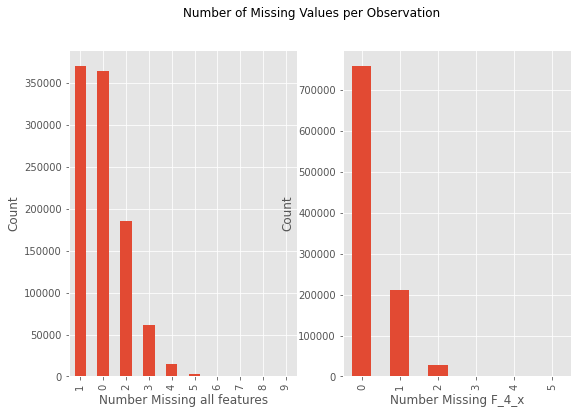

In [46]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 6))
data['n_missing'].value_counts().plot(ax=ax1, kind='bar', xlabel='Number Missing all features', ylabel='Count')
data['F4_missing'].value_counts().plot(ax=ax2, kind='bar', xlabel='Number Missing F_4_x', ylabel='Count')
plt.suptitle('Number of Missing Values per Observation')
plt.show()

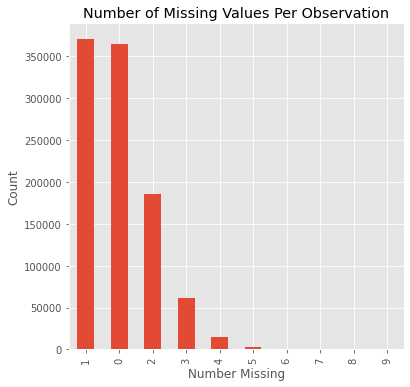

In [32]:
plot = data['n_missing'].value_counts().plot(kind='bar', title='Number of Missing Values Per Observation', figsize=(6, 6), xlabel='Number Missing', ylabel='Count')

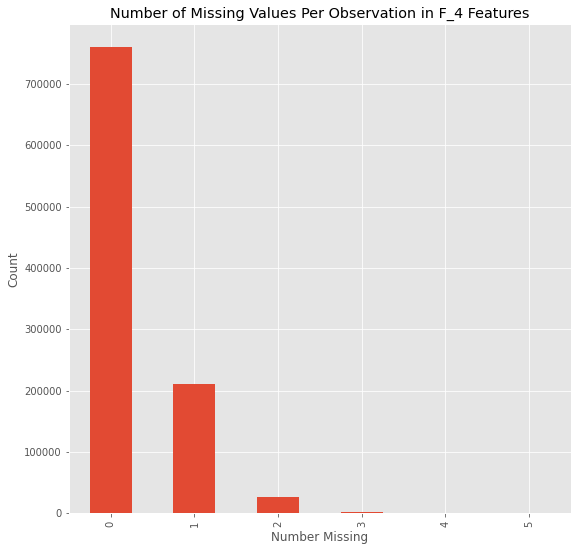

In [31]:
f4plot = data['F4_missing'].value_counts().plot(kind='bar', title='Number of Missing Values Per Observation in F_4 Features', figsize=(9, 9), xlabel='Number Missing', ylabel='Count')

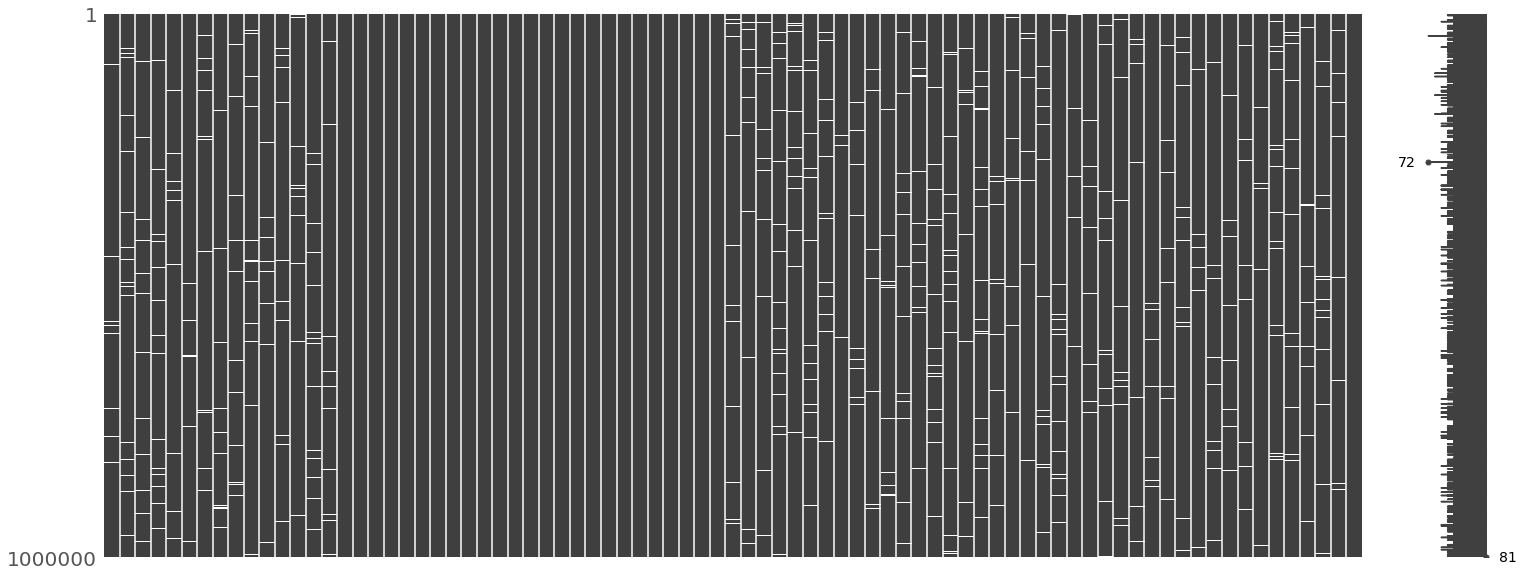

In [ ]:
msno.matrix(data)

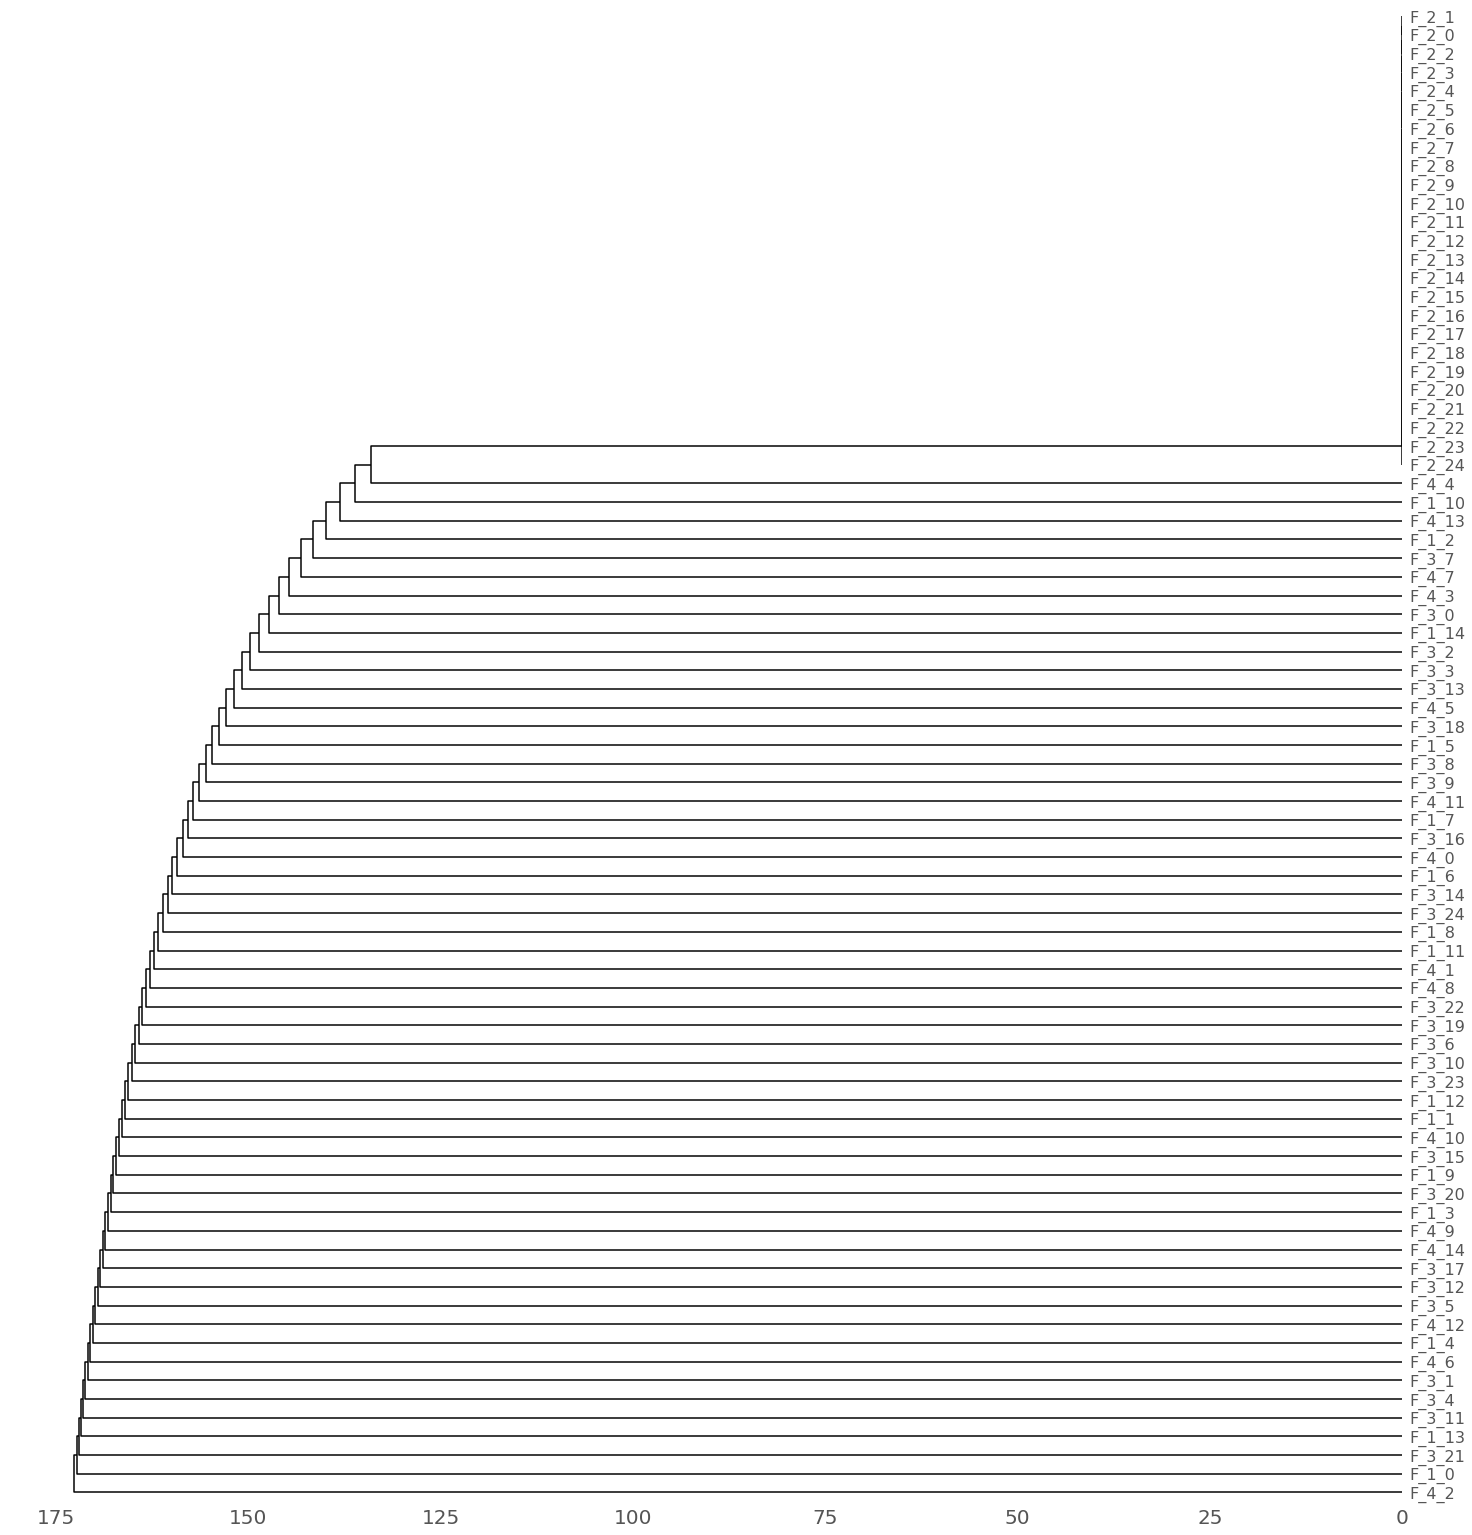

In [9]:
msno.dendrogram(data.drop(columns=['F4_missing', 'n_missing']))

## Numerical Histograms and Box Plots

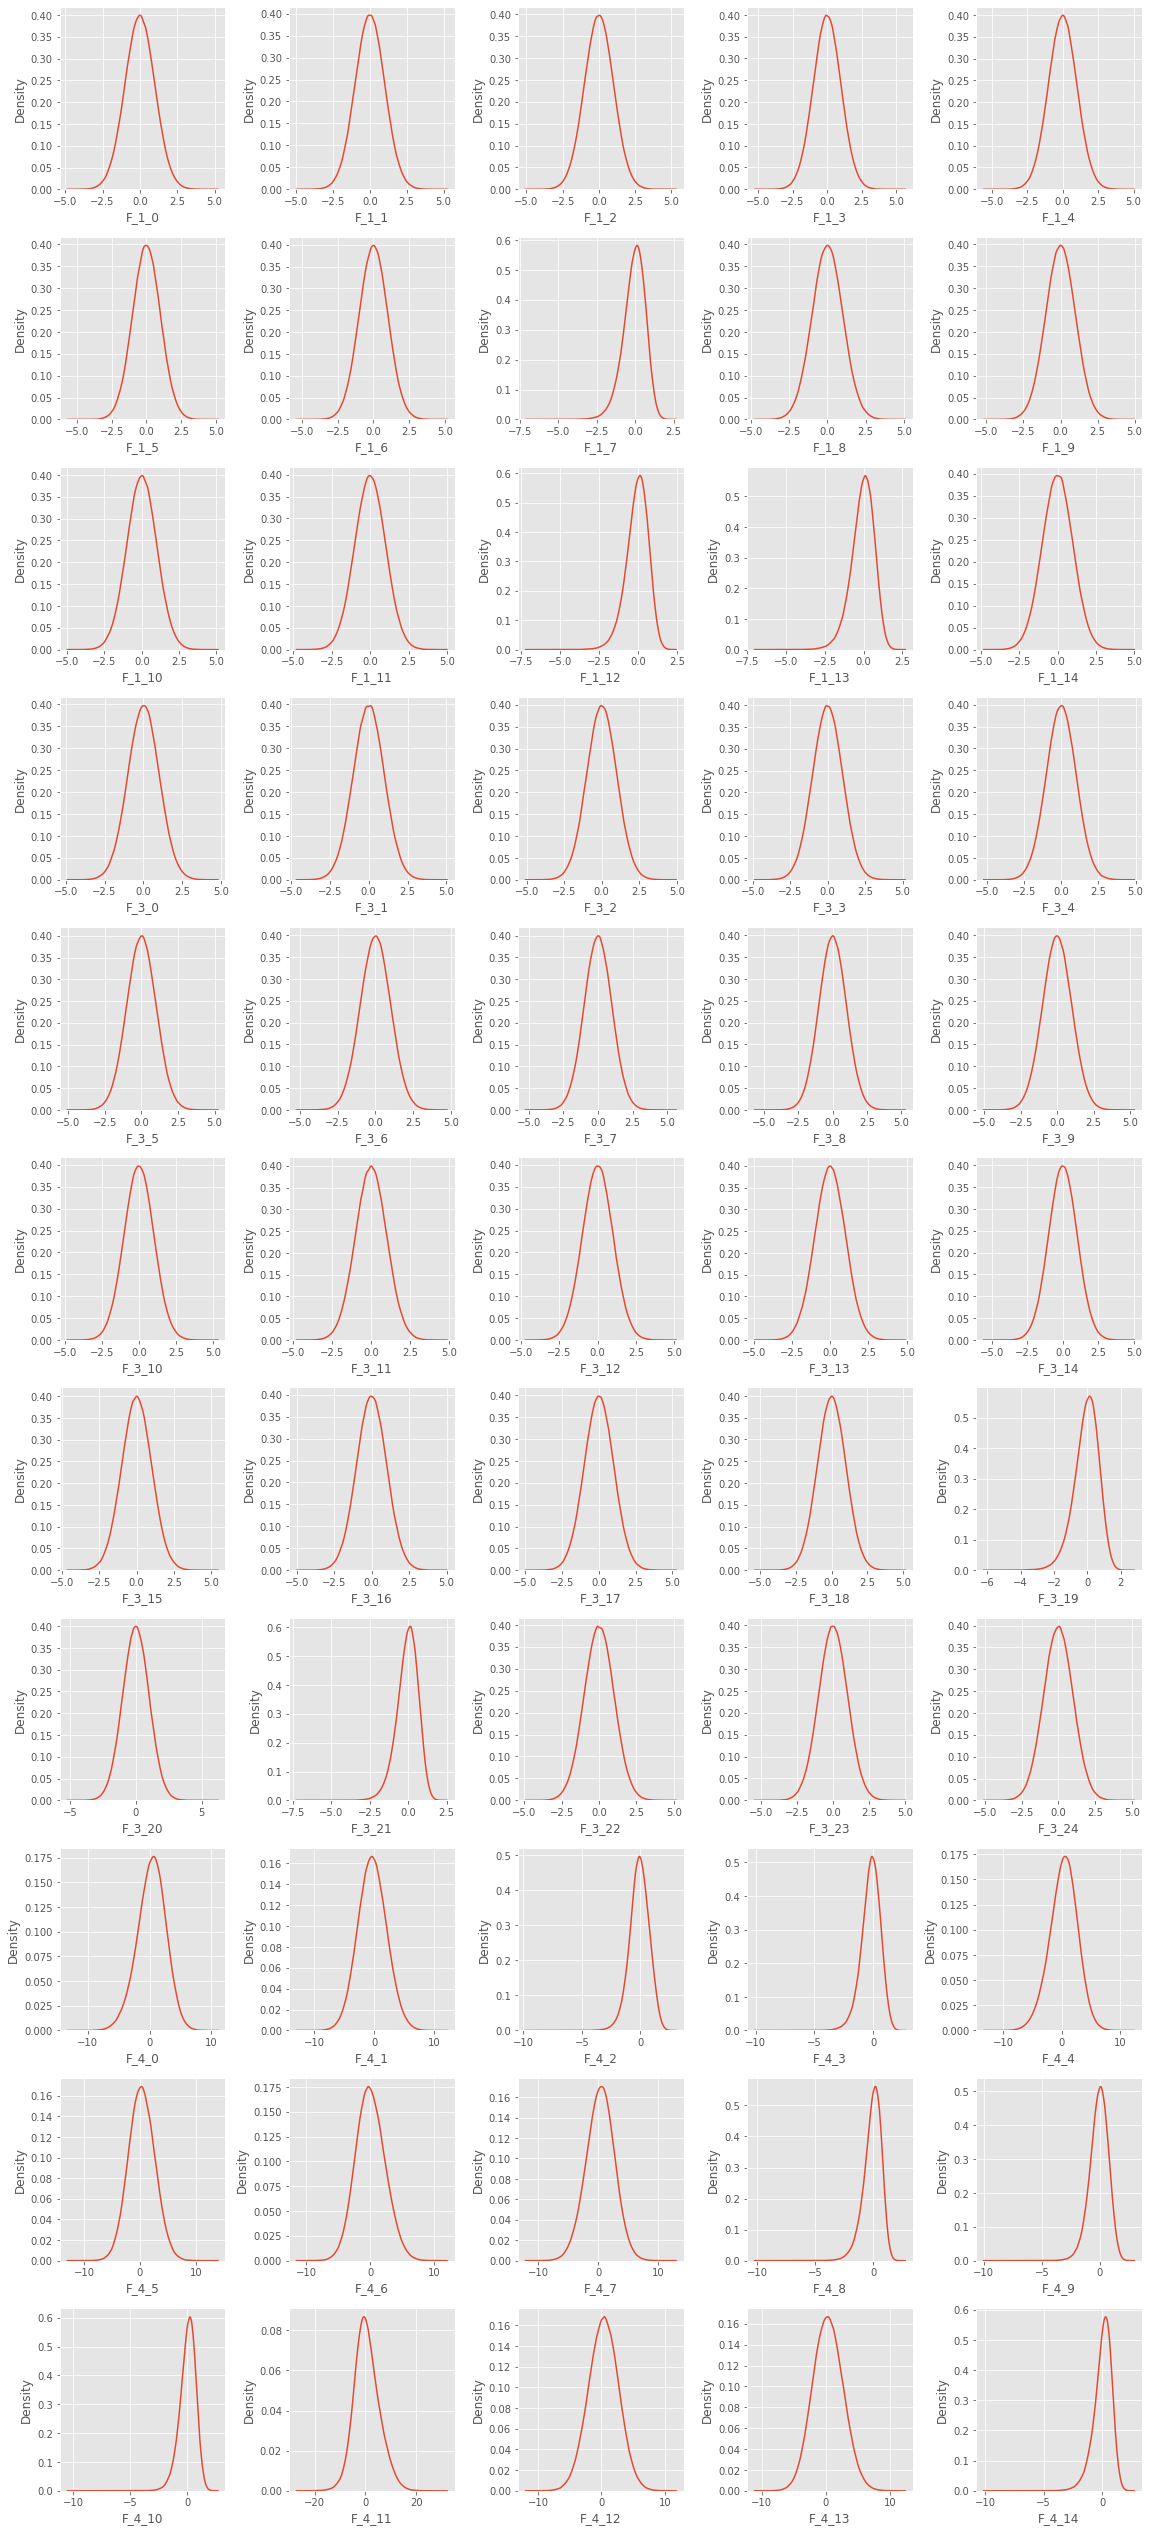

In [ ]:
functions.clf_plot_distributions(data, features=F1+F3+F4, ncols=5, method='hist')

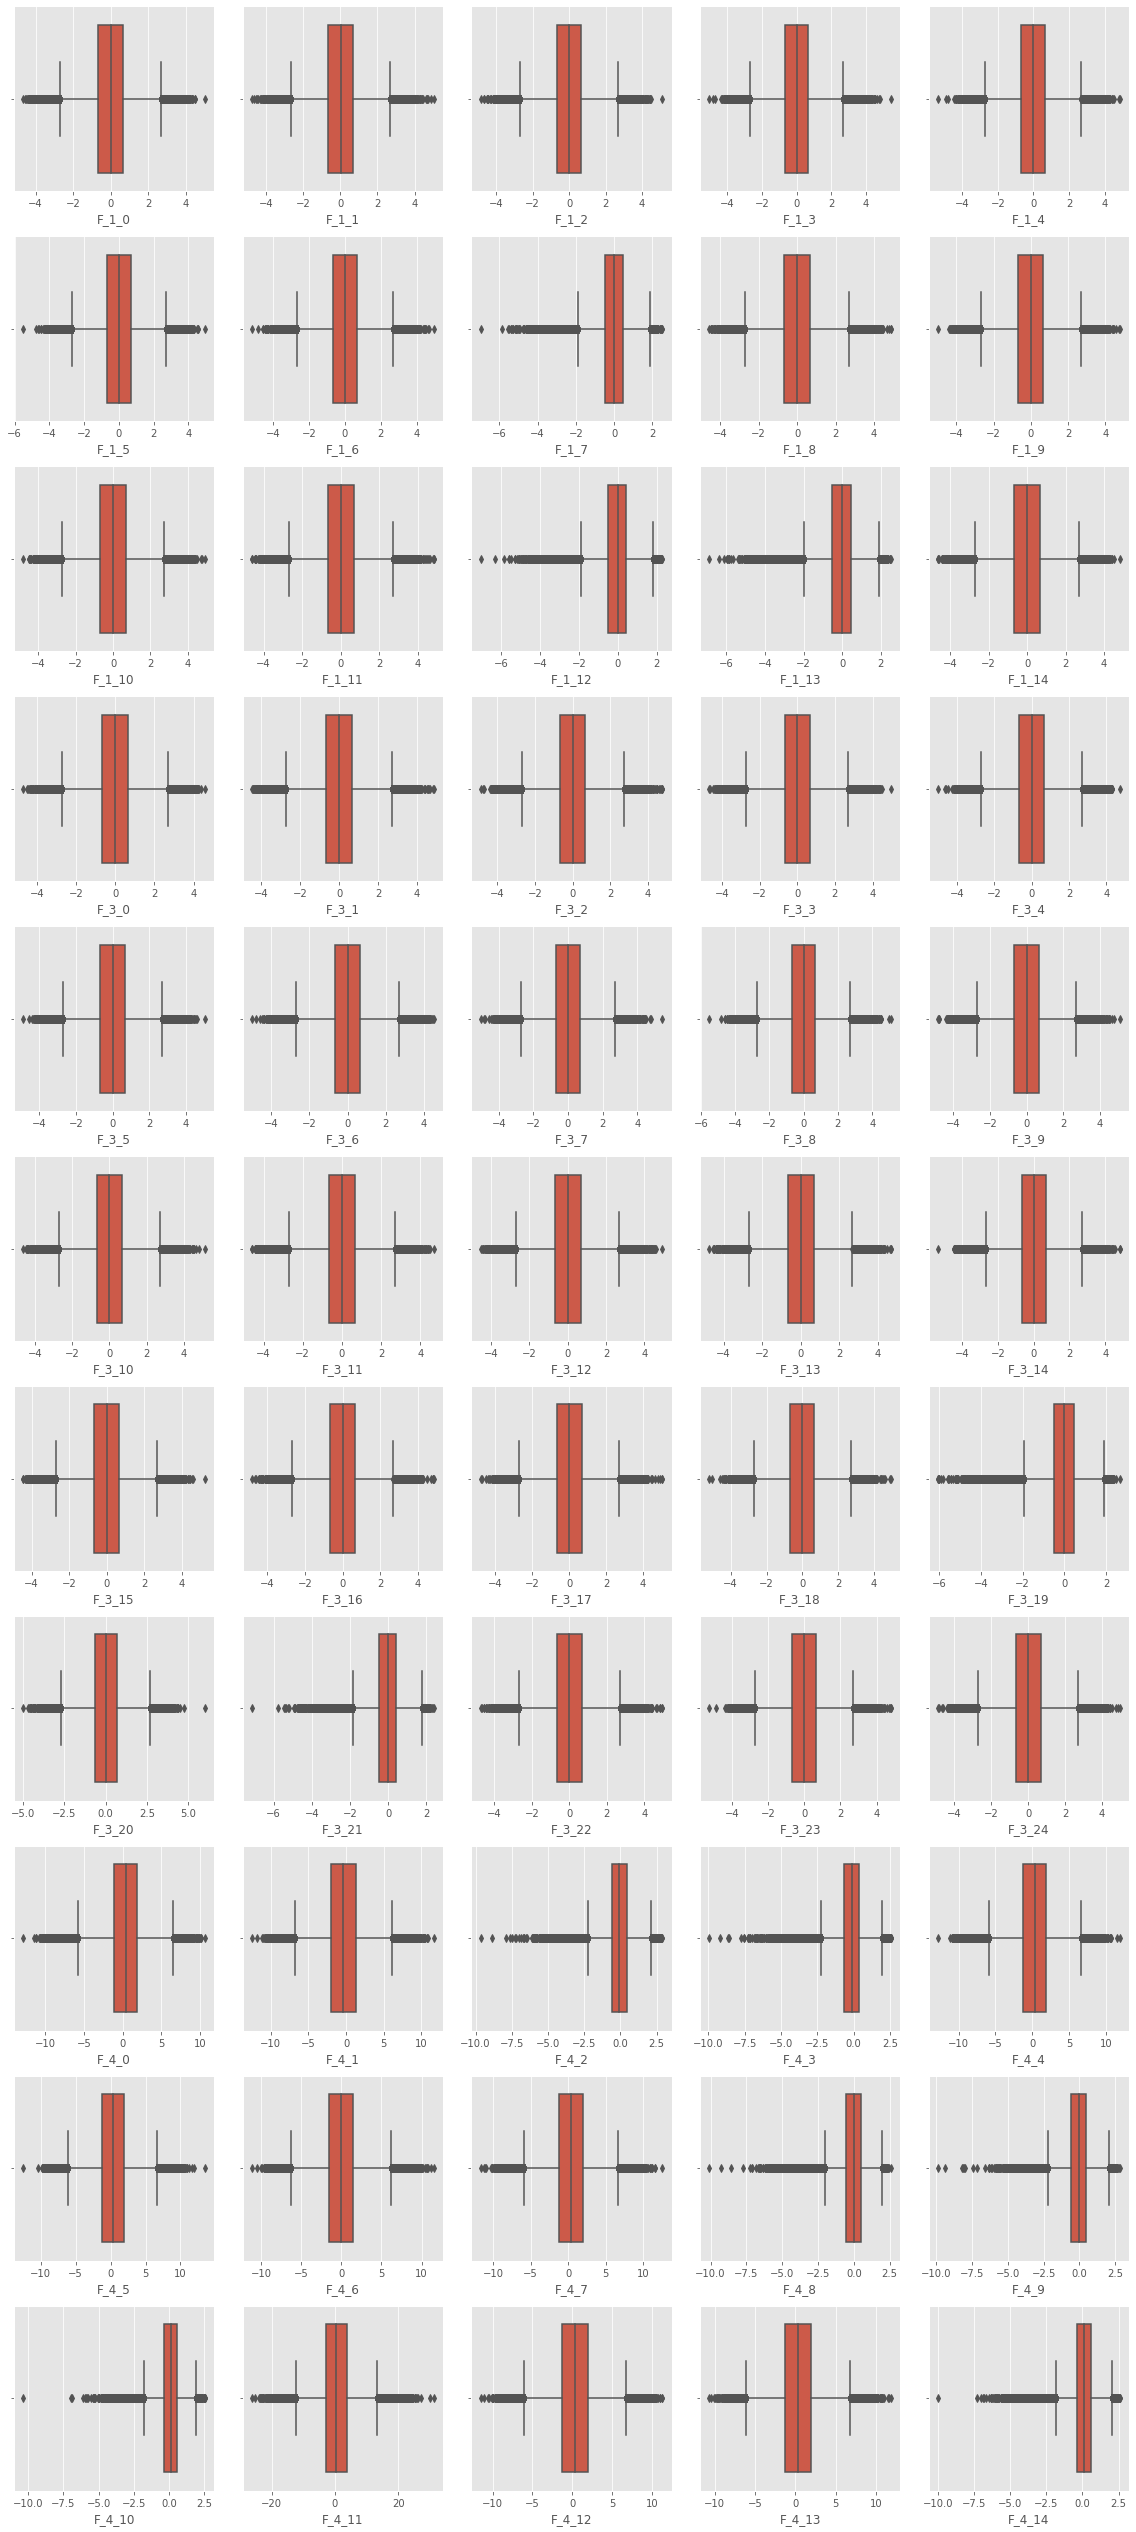

In [ ]:
functions.clf_plot_distributions(data, features=F1+F3+F4, ncols=5, method='box')

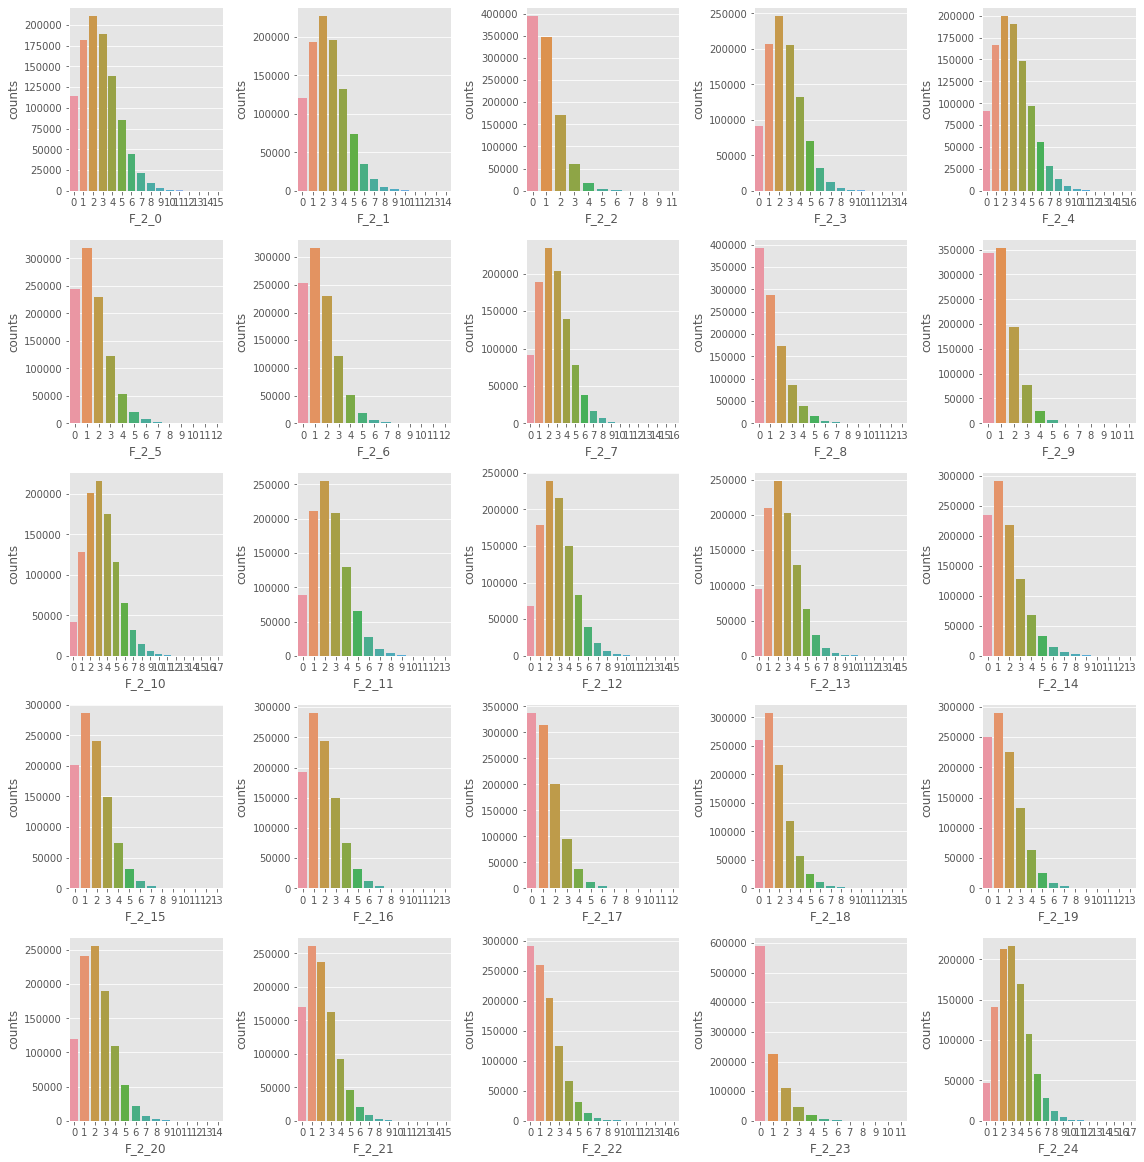

In [ ]:
functions.clf_plot_distributions(data, F2, ncols=5, method='bar')

### Analysis
- About 60% of observations have 0 or 1 missing values, almost 50/50 and canhave up to nine missing values.
- F_1 and F_3 histograms are both normal looking without much variation compared to F_4
- F_1: 7, 12, 13; F_3: 19, 21; F_4: 2, 3, 8, 9, 10 and 14 have outliers
- F_2s have a variety of means and medians with skew to the right

## Outlier Elimination/Power Transformation

In [ ]:
functions.outlier_elimination(data).to_csv('drive/MyDrive/Kaggle/Imputation_062022/data_no_outliers.csv', index='row_id')

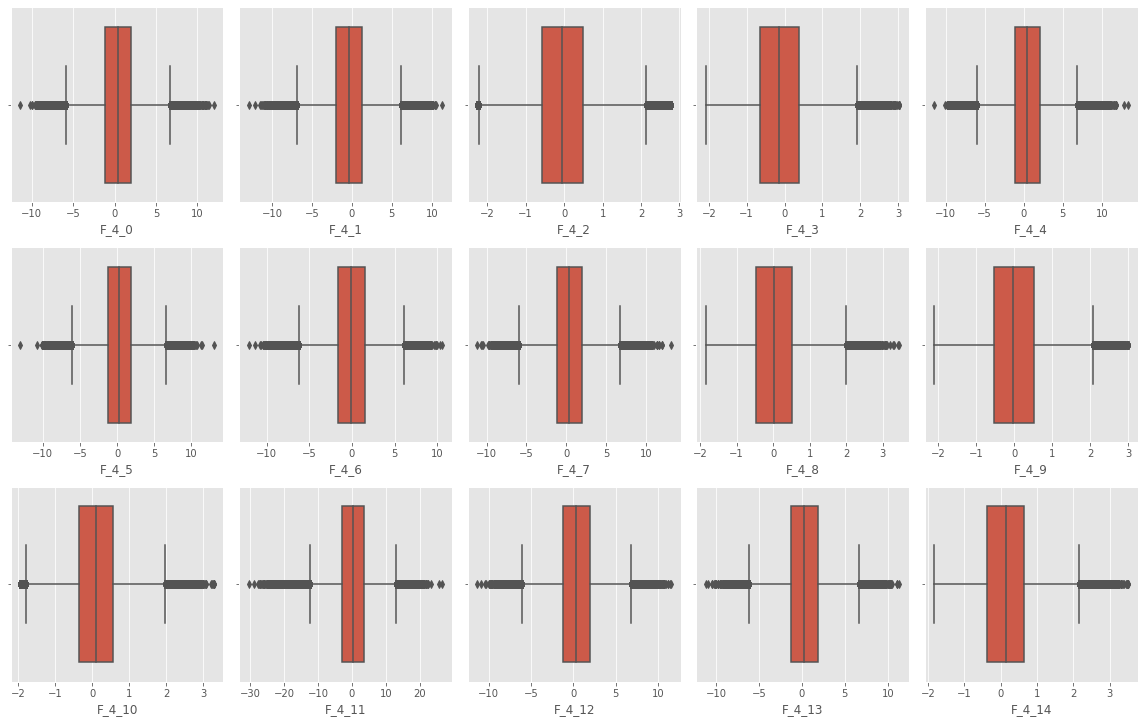

In [ ]:
transformer = PowerTransformer(method='yeo-johnson', standardize=False)
F4_data = pd.DataFrame(transformer.fit_transform(data[F4]), columns=F4)
functions.clf_plot_distributions(F4_data, features=F4, ncols=5, method='box')
F4_data.to_csv('drive/MyDrive/Kaggle/Imputation_062022/F4_transformed.csv', index='row_id')

- Transforming the data instead of removing the outliers should be the best method as we are not throwing away potentially useful data. The power transformation was also quite sucessful looking at the new box plots

## Correlations

Text(0.5, 1.0, 'Correlations')

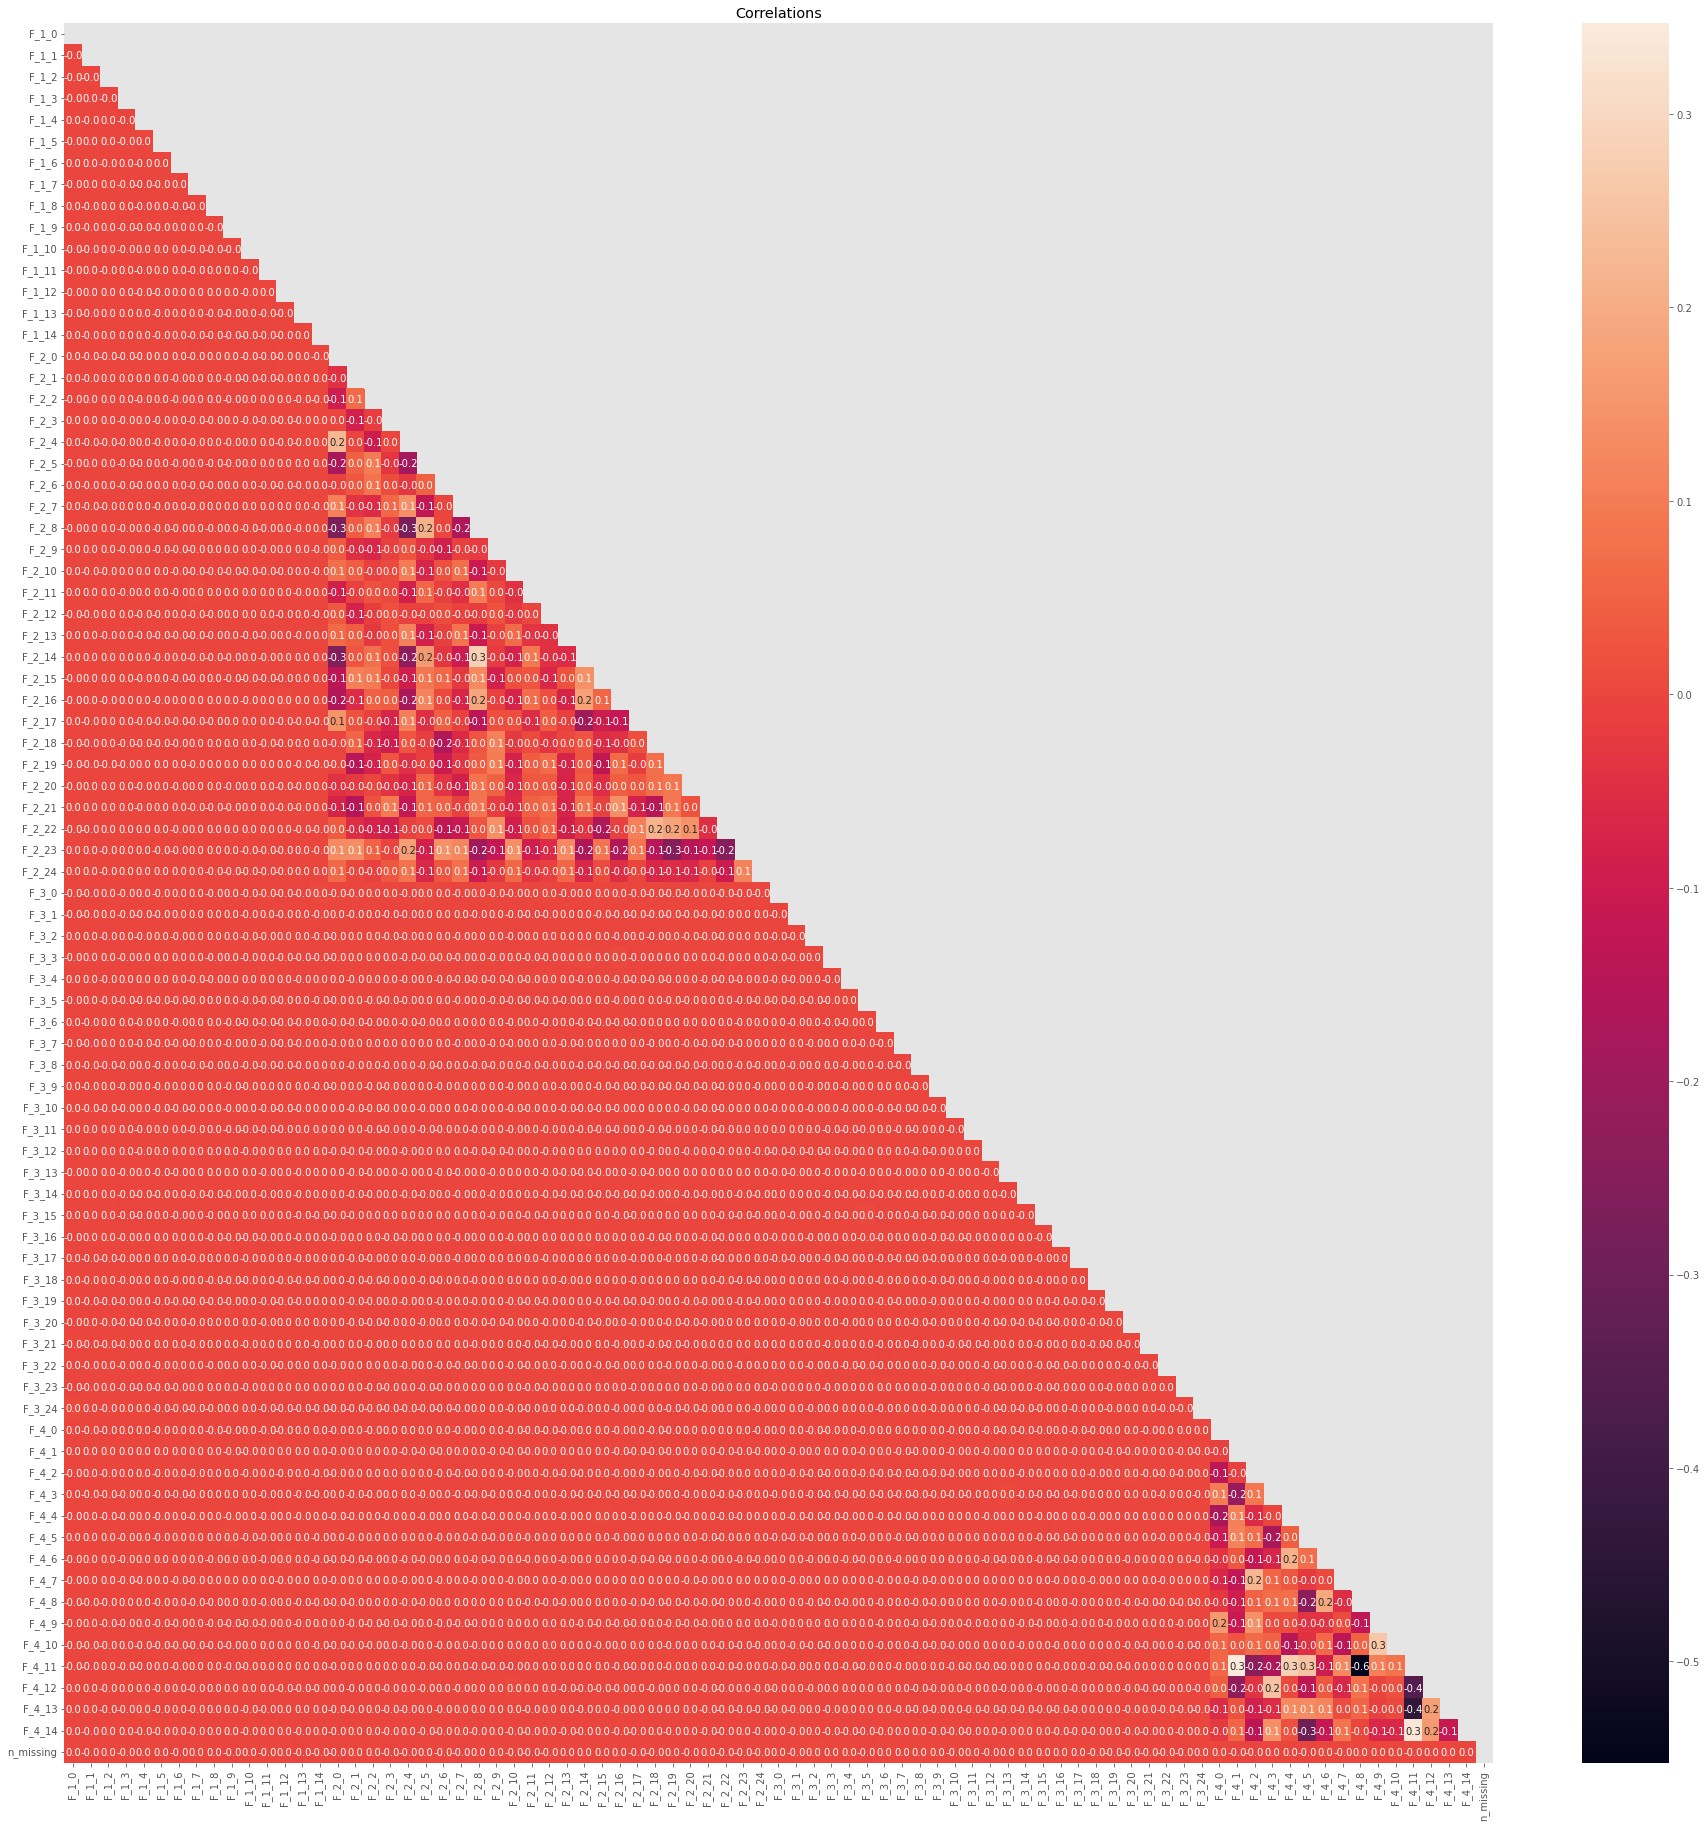

In [ ]:
corr = data.corr()
matrix = np.triu(corr)
fig, ax = plt.subplots(figsize=(32, 32))
sns.heatmap(corr,  xticklabels=corr.columns, yticklabels=corr.columns, annot=True, mask=matrix, ax=ax, fmt='.1f');
ax.set_title('Correlations')

# Conclusion
- Due to the independent nature of F_1 and F_3, imputed with feature means should give us the best RMSE possible
- Efforts should be focused on F_4
- Maybe look into F_2 (groups, sum, etc.)